# Assignement n.4

Collect the ABALONE Dataset from [here](https://archive.ics.uci.edu/ml/datasets/Abalone).

You'll get 2 files:
   * abalone.data  : csv for the dataset
   * abalone.names : explanation and names of the attributes.
   
## GOALS:

  1. Provide basic data exploration results on the dataset
  2. Train a binary classifier on the Abalone dataset for the following target classes:
      * 0: young snail, number of rings <= 12
      * 1: old snail, number of rings > 12

### Notes:

  * Use 70-30 as train-test split
  * Try different classifiers and compare the results
  * Provide an evaluation of the classifier
  * *Optional* Tune the classifier's hyperparameters
  * Comment with markdown cells everything you code

1-Provide basic data exploration results on the dataset

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
albone_url = './abalone.data'
albone_df = pd.read_table(albone_url, sep=',', names=["Sex", "Length", "Diameter", "Height","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Rings"])

In [26]:
albone_df.head(2)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


In [27]:
with open("./abalone.names") as f:
    print(f.read())

1. Title of Database: Abalone data

2. Sources:

   (a) Original owners of database:
	Marine Resources Division
	Marine Research Laboratories - Taroona
	Department of Primary Industry and Fisheries, Tasmania
	GPO Box 619F, Hobart, Tasmania 7001, Australia
	(contact: Warwick Nash +61 02 277277, wnash@dpi.tas.gov.au)

   (b) Donor of database:
	Sam Waugh (Sam.Waugh@cs.utas.edu.au)
	Department of Computer Science, University of Tasmania
	GPO Box 252C, Hobart, Tasmania 7001, Australia

   (c) Date received: December 1995


3. Past Usage:

   Sam Waugh (1995) "Extending and benchmarking Cascade-Correlation", PhD
   thesis, Computer Science Department, University of Tasmania.

   -- Test set performance (final 1044 examples, first 3133 used for training):
	24.86% Cascade-Correlation (no hidden nodes)
	26.25% Cascade-Correlation (5 hidden nodes)
	21.5%  C4.5
	 0.0%  Linear Discriminate Analysis
	 3.57% k=5 Nearest Neighbour
      (Problem encoded as a classification task)

   -- Data set samp

In [28]:
albone_df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


**Description of the table above** <br/>
The dataset Albone has 1 to 29 rings in total. <br/> 
However, the most frequent spicies have 9 rings <br/> 
We can also notice that we have outliers as the fact that the maximum of rings is 29 <br/>
the values of the 1st, 2nd and 3rd quantile are close to each other, respectively : 8,9,and 11. This means that the distribution of our dataset is narrow gaussian distribution

**Check the missing values:**

In [29]:
albone_df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

There is no missing values in the features of Albone dataset 

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole_weight'}>],
       [<AxesSubplot:title={'center':'Shucked_weight'}>,
        <AxesSubplot:title={'center':'Viscera_weight'}>,
        <AxesSubplot:title={'center':'Shell_weight'}>,
        <AxesSubplot:title={'center':'Rings'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

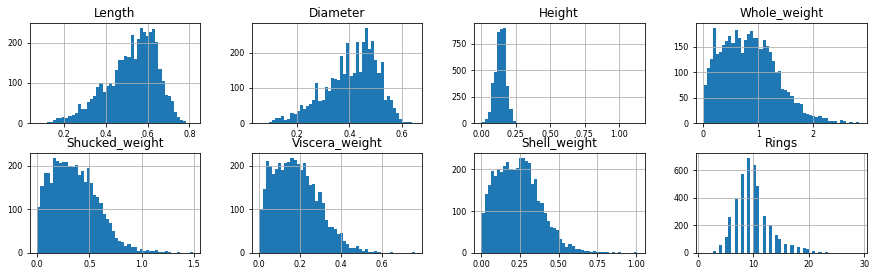

In [30]:
albone_df.hist(layout=(4,4), bins=50, xlabelsize=8, ylabelsize=8, figsize=(15,9))

<AxesSubplot:ylabel='Density'>

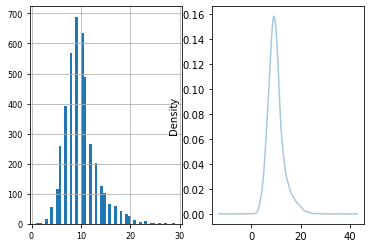

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2)
albone_df.Rings.hist(bins=50, xlabelsize=8, ylabelsize=8,ax=axes[0])
albone_df.Rings.plot.kde(alpha=0.4, ax=axes[1])

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'Length'),
  Text(2, 0, 'Diameter'),
  Text(3, 0, 'Height'),
  Text(4, 0, 'Whole_weight'),
  Text(5, 0, 'Shucked_weight'),
  Text(6, 0, 'Viscera_weight'),
  Text(7, 0, 'Shell_weight'),
  Text(8, 0, 'Rings')])

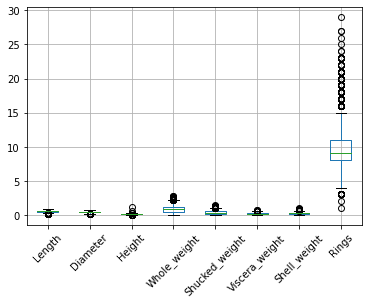

In [32]:
names=["Sex", "Length", "Diameter", "Height","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Rings"]
df = pd.DataFrame(data = albone_df, columns = names)
df.boxplot()
plt.xticks(rotation=45)

C:\Users\Polytech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

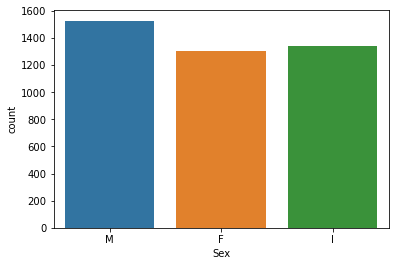

In [33]:
import seaborn as sns
sns.countplot(albone_df.Sex)

<AxesSubplot:>

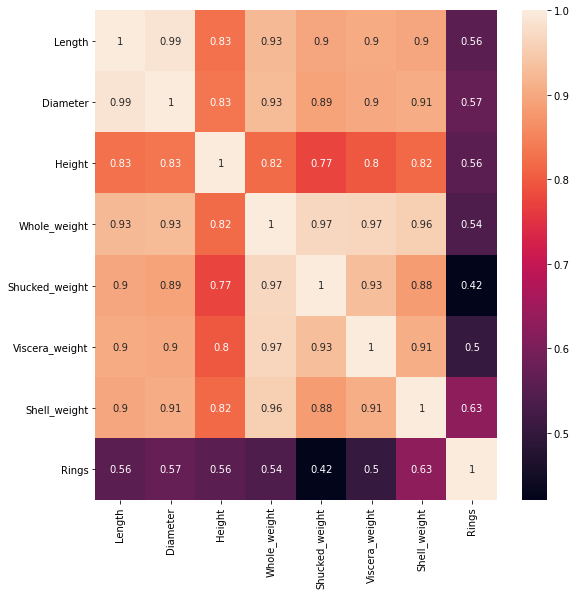

In [34]:
plt.figure(figsize=(9,9))
sns.heatmap(albone_df.corr(), annot=True)

Comments : most of the features correlated to the target "Rings" is Height & Shell_weight (with respectively 56% and 63%)

<Figure size 1440x360 with 0 Axes>

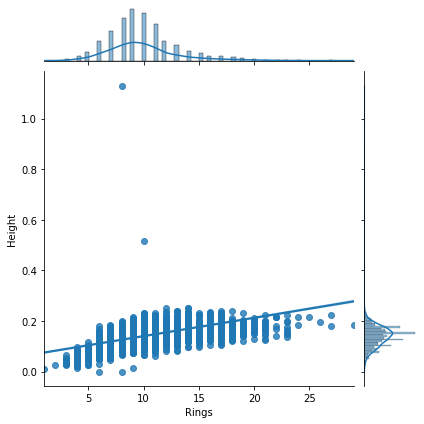

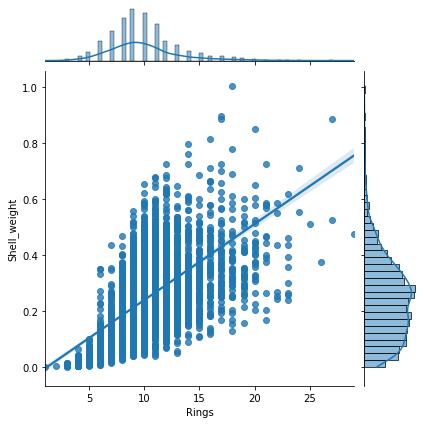

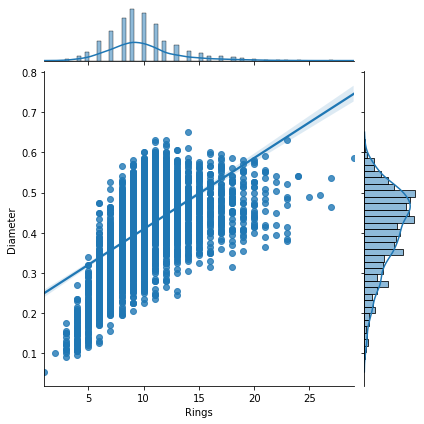

In [35]:
plt.figure(figsize=(20, 5))

sns.jointplot(data=albone_df, x='Rings', y='Height', kind='reg')
sns.jointplot(data=albone_df, x='Rings', y='Shell_weight', kind='reg')
sns.jointplot(data=albone_df, x='Rings', y='Diameter', kind='reg')

**comments** <br>
we can notice from the plots above that we have high correlation between (shell_weight, Rings) because we have disperse scatter plot while the correlation between(Height, rings) is lower because we have norrow scatter plot <br>
we can also notice that Diameter is correlated to Rings however, the best correlated feature is shell_weight <br>
the correlation can be proven with violin plot (figure above)

<AxesSubplot:xlabel='Rings', ylabel='Length'>

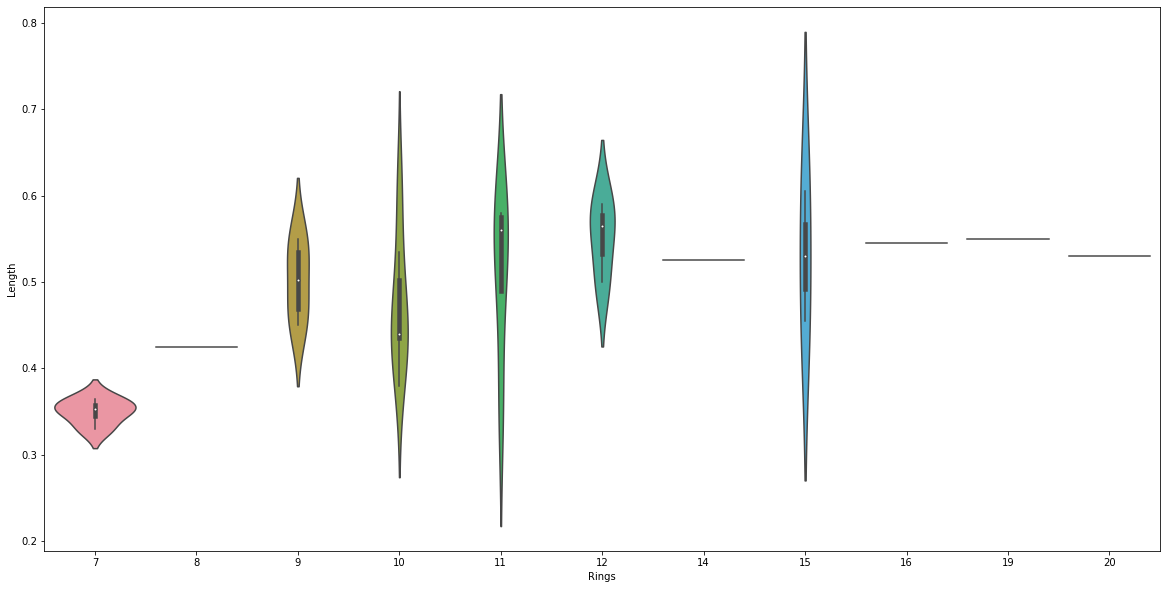

In [36]:
plt.figure(figsize=(20, 10))

sns.violinplot(data=albone_df.head(30), x='Rings', y='Length')

2- Train a binary classifier on the Abalone dataset for the following target classes:

In [37]:
target = []
for row in albone_df['Rings']:
    if row <= 12 :
        target.append(0)
    else:
        target.append(1)
albone_df['target'] = target
albone_df.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,target
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,1
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,1
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,0
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,1


In [38]:
# Starting from the original, non-cleaned dataset, split the dataset with a ratio of 0.2
from sklearn.model_selection import train_test_split

# target in "y"
y = albone_df['target']

# feature matrix in "X" 
columns = list(albone_df.columns)
columns.remove('target')
X = albone_df[columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1253, 9), (2924, 9), (1253,), (2924,))

<u>*Trying logistic regression classifier*<u>

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
'''
Build a pipeline that
- replaces missing numerical values with the mean value
- replaces missing categorical values with the most frequent value
- normalizes the numerical features
- one hot encodes the other categorical features
'''
numeric_features = [f for f, t in zip(X_train.columns, X_train.dtypes) if t in ['float64', 'int32']]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_features = [f for f in X_train.columns if f not in numeric_features]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder(handle_unknown='ignore'))])
categorical_features,numeric_features

(['Sex', 'Rings'],
 ['Length',
  'Diameter',
  'Height',
  'Whole_weight',
  'Shucked_weight',
  'Viscera_weight',
  'Shell_weight'])

In [40]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [41]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LogisticRegression())])

In [42]:
# Model training
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Whole_weight',
                                                   'Shucked_weight',
                                                   'Viscera_weight',
                                                   'Shell_weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   Simple

In [43]:
# Prediction
y_pred = clf.predict(X_test)

*The evaluation of logistic regression classifier :*

In [44]:
# Model evaluation
from sklearn.metrics import accuracy_score

ACC = accuracy_score(y_test, y_pred)
print("model accuracy: %.3f" % ACC)

model accuracy: 0.998


In [45]:
# Print confusion matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[2433    2]
 [   3  486]]


In [48]:
import category_encoders as ce
names=["Sex", "Length", "Diameter", "Height","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Rings"]
encoder = ce.OrdinalEncoder(cols=names)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

<u>*trying KNN classifier*<u>

In [49]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model =  KNeighborsClassifier(n_neighbors=8)

In [50]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [51]:
KNN_prediction = KNN_model.predict(X_test)

In [52]:
from sklearn.metrics import classification_report

print(accuracy_score(KNN_prediction, y_test))
# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(KNN_prediction, y_test))
print(classification_report(KNN_prediction, y_test))

0.832421340629275
[[2434  489]
 [   1    0]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      2923
           1       0.00      0.00      0.00         1

    accuracy                           0.83      2924
   macro avg       0.50      0.42      0.45      2924
weighted avg       1.00      0.83      0.91      2924



<u>SVM Classifier model <u>

In [54]:
from sklearn.svm import SVC
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
print(SVC_model.score(X_train, y_train))

0.8371907422186752


<u> Decision Tree classifier <u>

In [57]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [58]:
y_pred = model.predict(X_test)

In [61]:
print(f'Model accuracy score: {accuracy_score(y_test, y_pred):0.4f}')

Model accuracy score: 0.9774


In [62]:
def pipeline(data):
    classifiers = []
    pass

In [63]:
y_pred_train = model.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.9832402234636871

[Text(283.2923076923077, 380.52, 'X[8] <= 11.5\ngini = 0.273\nsamples = 1253\nvalue = [1049, 204]'),
 Text(103.01538461538462, 271.8, 'X[8] <= 3.5\ngini = 0.059\nsamples = 1047\nvalue = [1015, 32]'),
 Text(51.50769230769231, 163.07999999999998, 'gini = 0.0\nsamples = 455\nvalue = [455, 0]'),
 Text(154.52307692307693, 163.07999999999998, 'X[8] <= 4.5\ngini = 0.102\nsamples = 592\nvalue = [560, 32]'),
 Text(103.01538461538462, 54.360000000000014, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(206.03076923076924, 54.360000000000014, 'gini = 0.051\nsamples = 575\nvalue = [560, 15]'),
 Text(463.5692307692308, 271.8, 'X[0] <= 2.5\ngini = 0.276\nsamples = 206\nvalue = [34, 172]'),
 Text(360.55384615384617, 163.07999999999998, 'X[1] <= 108.0\ngini = 0.038\nsamples = 156\nvalue = [3, 153]'),
 Text(309.04615384615386, 54.360000000000014, 'gini = 0.025\nsamples = 155\nvalue = [2, 153]'),
 Text(412.0615384615385, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(566.584615

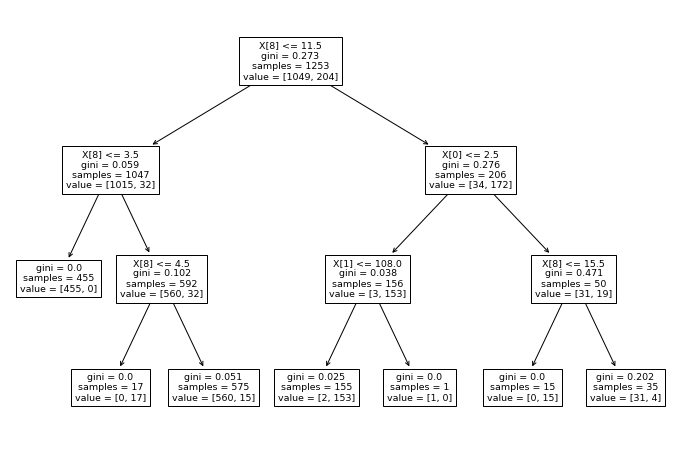

In [65]:
from sklearn import tree

plt.figure(figsize=(12,8))
tree.plot_tree(model.fit(X_train, y_train))

In [66]:
cm = confusion_matrix(y_test, y_pred)

cm

array([[2423,   12],
       [  54,  435]], dtype=int64)

<u> *Conclusion* <u> 

After trying multiple classifier, we come to the conclusion that the best classifiers for the Abalone dataset is **logistic regression & decision tree** with an accuraccy of 0.998 and 0.988 respectively